# **MAPA DE CALOR**

In [22]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/ejemplos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Matplotlib')) + "/"

In [23]:
import pandas as pd


filename = data_dir + "imdb_top_1000.csv"
df = pd.read_csv(filename, usecols=["Certificate", "Genre", "IMDB_Rating"])
df

,Certificate,Genre,IMDB_Rating
0,A,Drama,9.3
1,A,"Crime, Drama",9.2
2,UA,"Action, Crime, Drama",9.0
3,A,"Crime, Drama",9.0
4,U,"Crime, Drama",9.0
...,...,...,...
995,A,"Comedy, Drama, Romance",7.6
996,G,"Drama, Western",7.6
997,Passed,"Drama, Romance, War",7.6
998,NaN,"Drama, War",7.6


In [24]:
df=df.dropna()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Certificate  899 non-null    object 
 1   Genre        899 non-null    object 
 2   IMDB_Rating  899 non-null    float64
dtypes: float64(1), object(2)
memory usage: 28.1+ KB


In [25]:
df

,Certificate,Genre,IMDB_Rating
0,A,Drama,9.3
1,A,"Crime, Drama",9.2
2,UA,"Action, Crime, Drama",9.0
3,A,"Crime, Drama",9.0
4,U,"Crime, Drama",9.0
...,...,...,...
993,A,"Drama, Mystery, Thriller",7.6
994,U,"Comedy, Music, Musical",7.6
995,A,"Comedy, Drama, Romance",7.6
996,G,"Drama, Western",7.6


In [26]:
df["Genero"] = df["Genre"].str.split(",", expand=True)[0]
df

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_10688\2960434234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genero"] = df["Genre"].str.split(",", expand=True)[0]


,Certificate,Genre,IMDB_Rating,Genero
0,A,Drama,9.3,Drama
1,A,"Crime, Drama",9.2,Crime
2,UA,"Action, Crime, Drama",9.0,Action
3,A,"Crime, Drama",9.0,Crime
4,U,"Crime, Drama",9.0,Crime
...,...,...,...,...
993,A,"Drama, Mystery, Thriller",7.6,Drama
994,U,"Comedy, Music, Musical",7.6,Comedy
995,A,"Comedy, Drama, Romance",7.6,Comedy
996,G,"Drama, Western",7.6,Drama


In [27]:
df_r = df.groupby(["Certificate", "Genero"])["IMDB_Rating"].mean()
df_r

Certificate  Genero   
16           Animation    8.100000
A            Action       7.873171
             Adventure    7.912500
             Animation    7.866667
             Biography    8.017647
                            ...   
UA           Crime        7.900000
             Drama        7.953659
             Horror       7.600000
             Mystery      8.250000
Unrated      Comedy       8.100000
Name: IMDB_Rating, Length: 79, dtype: float64

In [28]:
df_r = df_r.unstack()
df_r

Genero,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Film-Noir,Horror,Mystery,Western
Certificate,,,,,,,,,,,,
16,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,7.873171,7.912500,7.866667,8.017647,7.877778,8.130233,8.036364,NaN,NaN,8.02,7.94,8.3
Approved,7.700000,NaN,NaN,NaN,8.000000,8.000000,7.933333,NaN,8.1,NaN,NaN,NaN
G,7.800000,NaN,7.850000,8.100000,8.140000,NaN,7.800000,NaN,NaN,NaN,NaN,NaN
GP,NaN,7.600000,NaN,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN
PG,7.833333,7.928571,7.928571,7.975000,7.816667,NaN,8.025000,NaN,7.8,NaN,8.00,NaN
PG-13,7.783333,7.600000,7.866667,7.862500,7.785714,8.000000,7.775000,NaN,NaN,7.60,NaN,NaN
Passed,8.025000,8.000000,NaN,8.100000,8.010000,8.166667,7.980000,NaN,NaN,NaN,NaN,NaN
R,7.812500,7.900000,7.800000,7.900000,7.824138,7.814286,7.915094,NaN,NaN,8.05,NaN,NaN


In [29]:
df_r.index

Index(['16', 'A', 'Approved', 'G', 'GP', 'PG', 'PG-13', 'Passed', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'U', 'U/A', 'UA', 'Unrated'],
      dtype='object', name='Certificate')

In [30]:
calificaciones = ["U", "UA", "PG-13", "R", "A"]
generos = [ "Animation" , "Action" , "Adventure" , "Biography" , "Comedy" , "Crime" , "Drama" ]
df_r = df_r.loc[calificaciones, generos]
df_r

Genero,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
U,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
UA,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
PG-13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
R,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
A,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


In [33]:
calificaciones_legibles = {"U" : "ALL" , "UA" : ">12" , "PG-13" : ">13" , "R" : ">17" , "A" : ">18" }
df3 = df_r.reset_index()
df3 = df3["Certificate"].replace(calificaciones_legibles)
df_r.index = df3
df_r


Genero,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
ALL,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
>12,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
>13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
>17,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
>18,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


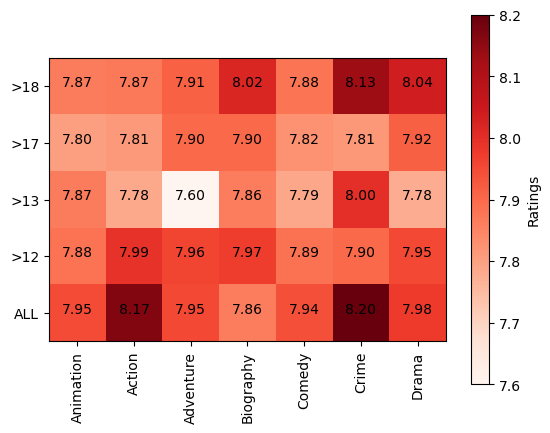

In [41]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()

im = ax.imshow(df_r,cmap="Reds")
cbar = fig.colorbar(im, ax=ax, label="Ratings")

x = df_r.columns
y = df_r.index

for i in range(len(y)):
  for j in range(len(x)):
    valor = df_r.iloc[i,j]
    ax.text(j, i, f"{valor:.2f}",ha="center")
    
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)

ax.invert_yaxis()